In [1]:
import copy
import os
import sys

sys.path.append('..')

import rasterio.errors
import rioxarray as rxr
from src.prepare_target import (reproject_and_Feature_match,
                            reproject_and_Feature_match_extended)


In [2]:
# Paths
path_to_morf_data = os.path.join("..", "data", "processed_files", "tifs", "elevation")
path_to_target_data = os.path.join("..", "data", "target")

# Define files to load:
# Initial target variable file
pathTarget = os.path.join(path_to_target_data, "cropmask.tif")
# Landcover file
pathLc = os.path.join(path_to_target_data, "LC_Prop3.tif")
# Preprocessed feature (any of features) for reprojection based on feature dimensions and scale
Feature = os.path.join(path_to_morf_data, "altitude.tif")


In [3]:
try:
    Target = rxr.open_rasterio(pathTarget).squeeze()
except rasterio.errors.RasterioIOError:
    print("Error: Target .tif not found.")
try:
    Target_new = copy.deepcopy(rxr.open_rasterio(Feature)[0, :, :].squeeze())
except rasterio.errors.RasterioIOError:
    print("Error: Feature .tif not found")
try:
    Landcover = rxr.open_rasterio(pathLc).squeeze()
except rasterio.errors.RasterioIOError:
    print("Error: Land cover .tif not found.")


In [30]:
rxr.open_rasterio(os.path.join("..", "data", "target", "target_croplands.tif")).squeeze()


<xarray.DataArray (y: 2450, x: 14695)>
[36002750 values with dtype=float64]
Coordinates:
    band         int64 1
  * x            (x) float64 20.0 20.01 20.02 20.03 ... 152.0 152.0 152.0 152.0
  * y            (y) float64 64.0 63.99 63.98 63.97 ... 42.03 42.02 42.01 42.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

Initial class distribution:
Class 1 : 0.83 %
Class 4 : 2.0 %
Class 2 : 2.33 %
Class 5 : 4.48 %
Class 3 : 4.85 %
Class 0 : 85.5 %


Distribution of classes after reprojection:
Class 1.0 : 1.08 %
Class 4.0 : 3.81 %
Class 2.0 : 4.3 %
Class 5.0 : 8.26 %
Class 3.0 : 8.6 %
Class 0.0 : 73.96 %


Reprojected raster saved in intended folder.


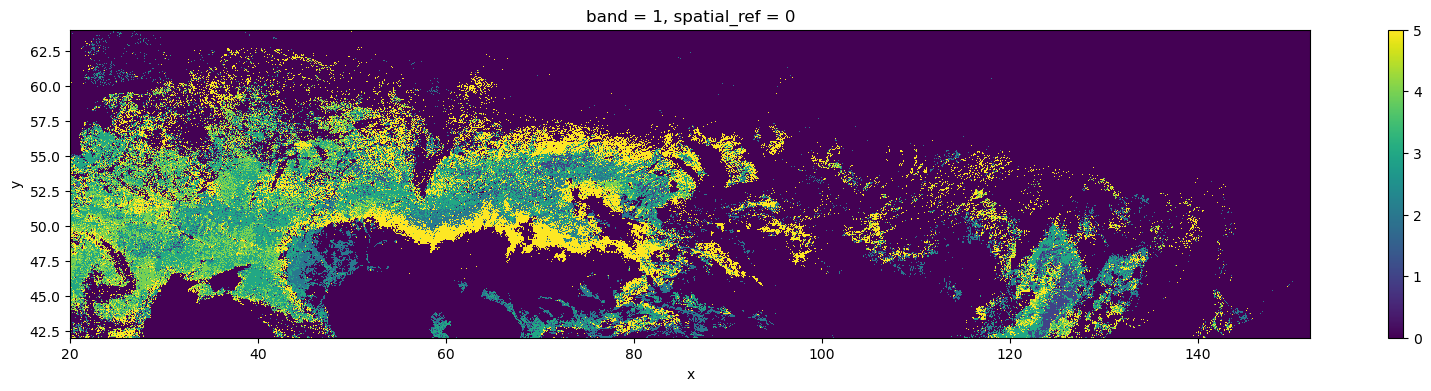

In [9]:
# Reprojection of raw target using feature as a sample
reproject_and_Feature_match(
    path_to_initial_target = pathTarget,
    path_to_any_feature = Feature,
    path_to_save = os.path.join("..", "data", "target", "target_croplands.tif"),
    crs_str = "EPSG:4326",
    plot = True,
)


Initial class distribution:
Class 1 : 0.83 %
Class 4 : 2.0 %
Class 2 : 2.33 %
Class 5 : 4.48 %
Class 3 : 4.85 %
Class 0 : 85.5 %


Distribution of classes after reprojection:
Class 7.0 : 0.05 %
Class 0.0 : 0.15 %
Class 14.0 : 0.42 %
Class 13.0 : 0.79 %
Class 11.0 : 0.9 %
Class 1.0 : 1.08 %
Class 15.0 : 1.1 %
Class 4.0 : 3.81 %
Class 6.0 : 4.24 %
Class 2.0 : 4.3 %
Class 5.0 : 8.26 %
Class 3.0 : 8.6 %
Class 8.0 : 11.65 %
Class 12.0 : 14.09 %
Class 9.0 : 20.04 %
Class 10.0 : 20.53 %


Reprojected raster saved in intended folder.


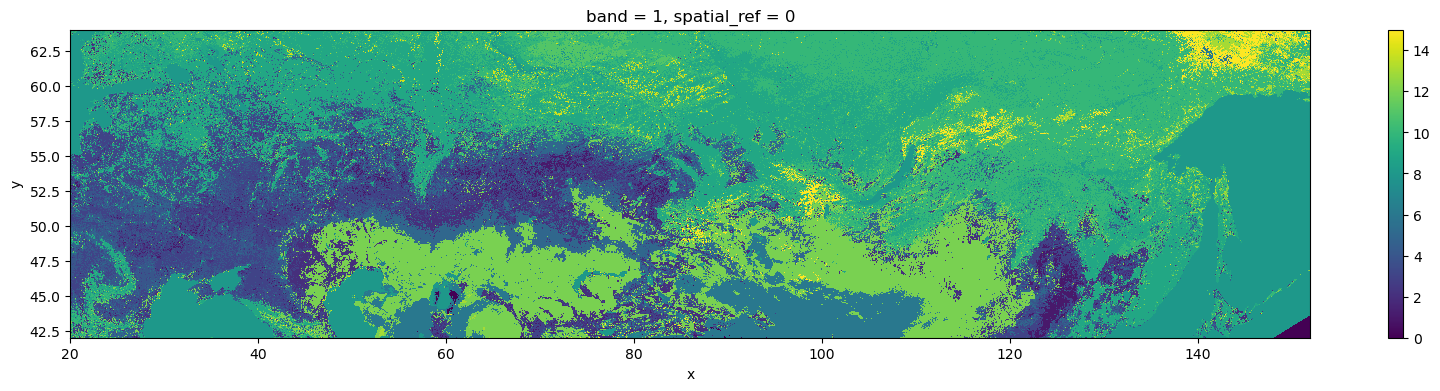

In [10]:
# Reprojection of raw target using feature and landcover data as a sample
reproject_and_Feature_match_extended(
    path_to_initial_target = pathTarget,
    path_to_any_feature = Feature,
    path_to_landcover_data = pathLc,
    path_to_save = os.path.join("..", "data", "target", "target_landcovers.tif"),
    crs_str = "EPSG:4326",
    plot = True,
)
